In [16]:
%load_ext autoreload
%autoreload 2

In [15]:
import numpy as np
import pylab as pl
import pandas as pd

from vent.common.loggers import DataLogger

In [24]:
filename = "./data/test/2020-07-16-13-51_controller_log.0.h5"
data = DataLogger().load_file(filename)

data["waveform_data"] = pd.DataFrame(data["waveform_data"])
data["control_data"] = pd.DataFrame(data["control_data"])
data["derived_data"] = pd.DataFrame(data["derived_data"])

2020-07-16 18:58:37,156 - vent.common.loggers - INFO - DataLogger init


Saving in.../home/dsuo/vent/logs/2020-07-16-18-58_controller_log.0.h5
Reading... ./data/test/2020-07-16-13-51_controller_log.0.h5
Saving in.../home/dsuo/vent/logs/2020-07-16-18-58_controller_log.0.h5


In [25]:
data["derived_data"]

,I_phase_duration,cycle_number,peep,peep_time,pip,pip_plateau,pip_time,timestamp,vte
0,1.068348,1,5.359383,0.000000,34.251456,33.184973,0.564008,1.594922e+09,0.514332
1,1.054078,2,4.951631,1.940180,33.972357,33.353698,0.574899,1.594922e+09,0.511608
2,1.060464,3,4.782906,2.067020,34.025083,33.204657,0.573550,1.594922e+09,0.480556
3,1.062855,4,5.401565,0.000000,33.958999,33.235590,0.571749,1.594922e+09,0.520333
4,1.058108,5,5.331263,1.869155,33.958296,32.929073,0.566911,1.594922e+09,0.481003
5,1.054347,6,4.782906,1.862150,33.907679,33.103422,0.559105,1.594922e+09,0.496817
6,1.063106,7,5.165350,0.000000,34.019459,33.395879,0.575537,1.594922e+09,0.500899
7,1.062303,8,5.317202,1.822957,34.039144,33.187785,0.570424,1.594922e+09,0.488673


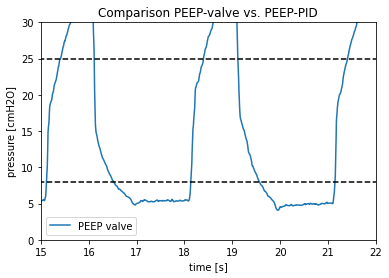

In [10]:
pl.plot(datav[:,0] - np.min(datav[:,0]), datav[:,1], label = "PEEP valve")
# pl.plot(datas[:,0] - np.min(datas[:,0]), datas[:,1], label = "PEEP PID'd")

pl.plot([0,40],[8,8],'k--')
pl.plot([0,40],[25,25],'k--')
pl.xlim([15,22])
pl.ylim([0,30])
pl.legend()
pl.xlabel("time [s]")
pl.ylabel("pressure [cmH2O]")
pl.title("Comparison PEEP-valve vs. PEEP-PID");

In [11]:
pl.plot(datam[:,0] - np.min(datam[:,0]), datam[:,1])

pl.plot([0,40],[8,8],'k--')
pl.plot([0,40],[35,35],'k--')
pl.xlim([15,22])
pl.ylim([0,40])
pl.xlabel("time [s]")
pl.ylabel("pressure [cmH2O]");
pl.title("Controlling towards higher pressure");

NameError: name 'datam' is not defined

In [13]:
filename = "./data/test/2020-07-16-13-51_controller_log.0.h5"

data_pressure = plot_data(filename)

dff = dl.load_file(filename)

ls_wv = dff['waveform_data']
ls_ct = dff['control_data']
data = np.zeros((len(ls_wv),2))
for idx in range(len(ls_wv)):
    data[idx,0] = ls_wv[idx][6]  # time
    data[idx,1] = ls_wv[idx][0]  # control in
    
#Get the target waveform from control commands, logged here:
ls_ct = dff['control_data']

PIP = [s[4] for s in ls_ct if s['name'] == b'ValueName.PIP'][0]
PEEP = [s[4] for s in ls_ct if s['name'] == b'ValueName.PEEP'][0]
PIP_TIME = [s[4] for s in ls_ct if s['name'] == b'ValueName.PIP_TI'][0]
PEEP_TIME = [s[4] for s in ls_ct if s['name'] == b'ValueName.PEEP_T'][0]
INSP_TIME = [s[4] for s in ls_ct if s['name'] == b'ValueName.INSPIR'][0]
BPM = [s[4] for s in ls_ct if s['name'] == b'ValueName.BREATH'][0]
        

Saving in.../home/dsuo/vent/logs/2020-07-16-18-41_controller_log.0.h5
Reading... ./data/test/2020-07-16-13-51_controller_log.0.h5
Saving in.../home/dsuo/vent/logs/2020-07-16-18-41_controller_log.0.h5
Reading... ./data/test/2020-07-16-13-51_controller_log.0.h5


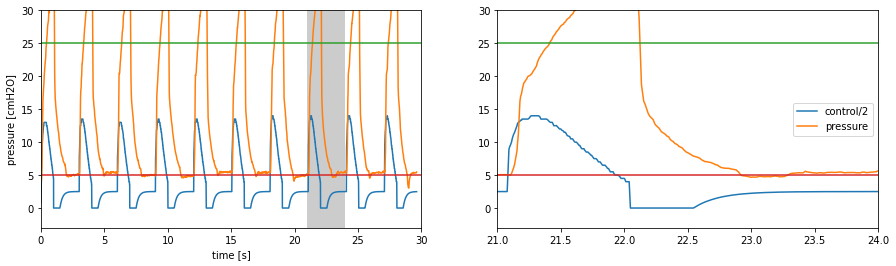

In [19]:
pl.rcParams['figure.figsize'] = [15, 4]

t1 = 21
t2 = t1+3
p0 = -3

PEEP=5
PIP=25
p1 =PIP+5


pl.subplot(1,2,1)
pl.plot(data[:,0] - np.min(data[:,0]), data[:,1]/2)
pl.plot(data_pressure[:,0] - np.min(data_pressure[:,0]), data_pressure[:,1])
pl.plot((0, 30),(PIP,PIP))
pl.plot((0, 30),(PEEP,PEEP))
#pl.plot([0,9],[10,10],'k--')
# pl.plot([30,60],[27.5,27.5],'k--')
pl.ylim([p0,p1])
#pl.xlim([0,70])
pl.xlim([0,30])

pl.xlabel("time [s]")
pl.ylabel("pressure [cmH2O]");
pl.gca().add_patch( pl.Rectangle((t1, p0), t2-t1, p1-p0, facecolor="black", alpha=0.2))

pl.subplot(1,2,2)
pl.plot(data[:,0] - np.min(data[:,0]), data[:,1]/2, label="control/2")
pl.plot(data_pressure[:,0] - np.min(data_pressure[:,0]), data_pressure[:,1], label = "pressure")
pl.plot((0, 30),(PIP,PIP))
pl.plot((0, 30),(PEEP,PEEP))
t_target = [x+6 for x in [0,PIP_TIME,INSP_TIME,INSP_TIME,PEEP_TIME+INSP_TIME,60/BPM]]
# pl.plot(t_target, [PEEP, PIP, PIP,PEEP,PEEP,PEEP],'o-', label = "target")
pl.ylim([p0,p1])
pl.xlim([t1,t2]);
pl.legend();
